# Homework Assignment Python APIs. 
# WeatherPy


In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
import pytemperature

# Import API key
import api_keys
api_key = "84a12051ef8d9ab784bd6f8864a8d6c2"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
Columnnames = ["City", "Country", "Temperature (F)", "Latitude", "Longitude", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]

Selected_Cities_df = pd.DataFrame(columns=Columnnames)

Selected_Cities_df.head

print("Beginning Data Retrieval \n---------------------------------")
for i in range(5): 
    print("Processing Record " + str(i) + " | " + cities[i])
    url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&q="
    combi_url = url + str(cities[i])+str("&appid=" + api_key)
    response = requests.get(combi_url)
    if response.status_code == 404:
        print("City not found, Skipping...")
    else:
        data = response.json()
        Selected_Cities_df = Selected_Cities_df.append({'City':data["name"],
                                                    'Country':data["sys"]['country'], 
                                                    'Temperature (F)':data["main"]["temp"],
                                                    'Latitude':data["coord"]["lat"],
                                                    'Longitude':data["coord"]["lon"],
                                                    'Humidity (%)':data["main"]["humidity"],
                                                    'Cloudiness (%)':data["clouds"]["all"],
                                                    'Wind Speed (mph)':data["wind"]["speed"]},
                                                    ignore_index=True)
    
print("------------------------------------\nData Retrieval Complete")   

Beginning Data Retrieval 
---------------------------------
Processing Record 0 | tivaouane
Processing Record 1 | cape town
Processing Record 2 | ushuaia
Processing Record 3 | beringovskiy
Processing Record 4 | geraldton
------------------------------------
Data Retrieval Complete


In [24]:
Selected_Cities_df.count()

City                5
Country             5
Temperature (F)     5
Latitude            5
Longitude           5
Humidity (%)        5
Cloudiness (%)      5
Wind Speed (mph)    5
dtype: int64

In [25]:
Selected_Cities_df

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Tivaouane,SN,66.20,14.95,-16.81,52,12,14.99
1,Cape Town,ZA,68.00,-33.93,18.42,68,75,10.29
2,Ushuaia,AR,48.20,-54.81,-68.31,61,75,28.86
3,Beringovskiy,RU,-13.65,63.05,179.32,100,0,1.05
4,Geraldton,CA,-5.81,49.72,-86.95,70,90,10.29


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
Selected_Cities_df.to_csv(output_data_file)

In [28]:
Selected_Cities_df

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Tivaouane,SN,66.20,14.95,-16.81,52,12,14.99
1,Cape Town,ZA,68.00,-33.93,18.42,68,75,10.29
2,Ushuaia,AR,48.20,-54.81,-68.31,61,75,28.86
3,Beringovskiy,RU,-13.65,63.05,179.32,100,0,1.05
4,Geraldton,CA,-5.81,49.72,-86.95,70,90,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

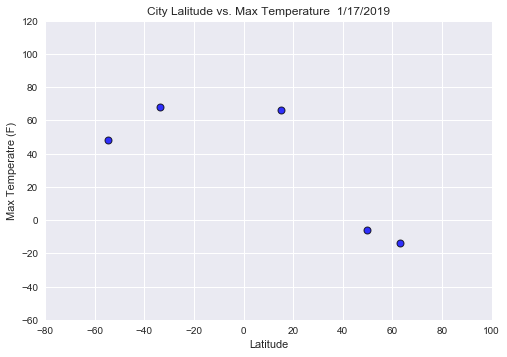

In [36]:
plt.scatter(Selected_Cities_df["Latitude"],
           Selected_Cities_df["Temperature (F)"],
           edgecolor="black", linewidths=1, marker="o",
           facecolors="blue", alpha=0.8, label="City")

plt.style.use('seaborn-darkgrid')
plt.title(f"City Latitude vs. Max Temperature  1/17/2019")
plt.ylabel("Max Temperatre (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80,100])
plt.ylim([-60,120])

plt.savefig("output_data/Latitude_Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

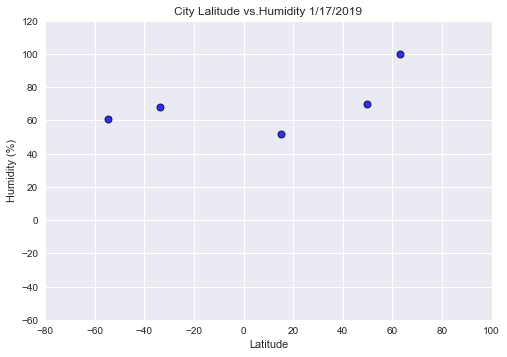

In [37]:
plt.scatter(Selected_Cities_df["Latitude"],
           Selected_Cities_df["Humidity (%)"],
           edgecolor="black", linewidths=1, marker="o",
           facecolors="blue", alpha=0.8, label="City")

plt.style.use('seaborn-darkgrid')
plt.title(f"City Latitude vs.Humidity 1/17/2019")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80,100])
plt.ylim([-60,120])

plt.savefig("output_data/Latitude_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

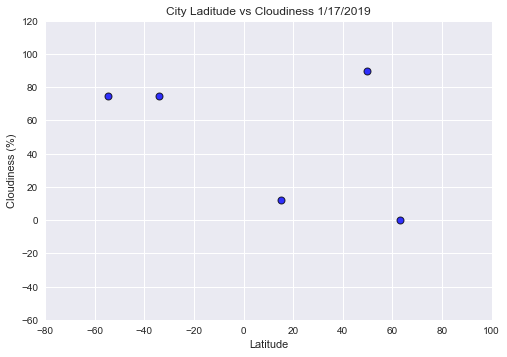

In [38]:
plt.scatter(Selected_Cities_df["Latitude"],
           Selected_Cities_df["Cloudiness (%)"],
           edgecolor="black", linewidths=1, marker="o",
           facecolors="blue", alpha=0.8, label="City")

plt.style.use('seaborn-darkgrid')
plt.title(f"City Laditude vs Cloudiness 1/17/2019")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80,100])
plt.ylim([-60,120])

plt.savefig("output_data/Latitude_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

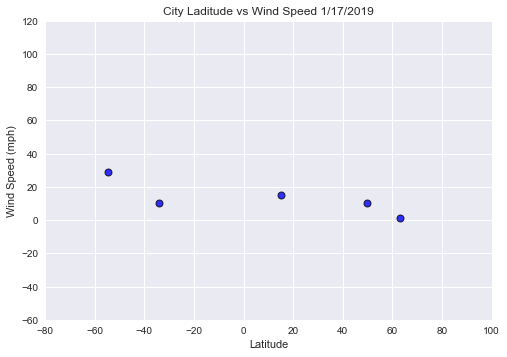

In [39]:
plt.scatter(Selected_Cities_df["Latitude"],
           Selected_Cities_df["Wind Speed (mph)"],
           edgecolor="black", linewidths=1, marker="o",
           facecolors="blue", alpha=0.8, label="City")

plt.style.use('seaborn-darkgrid')
plt.title(f"City Laditude vs Wind Speed 1/17/2019")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80,100])
plt.ylim([-60,120])

plt.savefig("output_data/Latitude_WindSpeed.png")

plt.show()

In [ ]:
###!!!! WRITTEN DESCRIPTION OF 3 OBSERVABLE TRENDS, bovenaan opdracht zetten evt?
----
### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.